# Lab 1: TCP Congestion Control

Learning Objectives:
- Understand the basics of how TCP congestion control works
- Explore different congestion control protocols and the design choices behind them
- Explore how the impact of different protocols on each others' flows

**Prerequisites**: This material assumes you have already configured your FABRIC account following the instructions in the provided 'fabric-setup.md' and 'fabric-setup.ipynb' files, as well as you have reserved resources for yourself as instructed in 'pre-lab1.ipynb'.

In this notebook you will be using the reserved resources to execute some experiments related to TCP congestion control. For this, you will:
-   Run the experiments on FABRIC resources
-   Retrieve files saved on FABRIC hosts
-   Visualize the data retrieved

### Log into resources

In 'pre-lab1.ipynb', you ran the cells under "Log into resources" to get the SSH commands that you need to use to access the hosts on FABRIC. You should use those commands to open up terminal windows on Jupyter.

To reiterate, you can do that as follows:

-   in Jupyter, from the menu bar, use File \> New \> Terminal to open a new terminal.
-   copy an SSH command from the table, and paste it into the terminal. (Note that each SSH command is a single line, even if the display wraps the text to a second line! When you copy and paste it, paste it all together.)

You can repeat this process (open several terminals) to start a session on each resource. Each terminal session will have a tab in the Jupyter environment, so that you can easily switch between them.

### Run the experiment

Now, you are ready to run the experiment! First, understand the background behind TCP congestion control protocols in the document 'congestion-control-bg.md'. Afterwards, follow the instructions in the 'experiments.md' page to send TCP flows between the two hosts, and generate data about the congestion window and slow start threshold over time.

When you have generated some data, you can use the cell below to transfer it from the sender host and visualize it here.

#### Exercise: visualization

In [27]:
import os
slice.get_node("romeo").download_file(os.path.join(os.getcwd() + "/sender-ss.csv"), "sender-ss.csv")

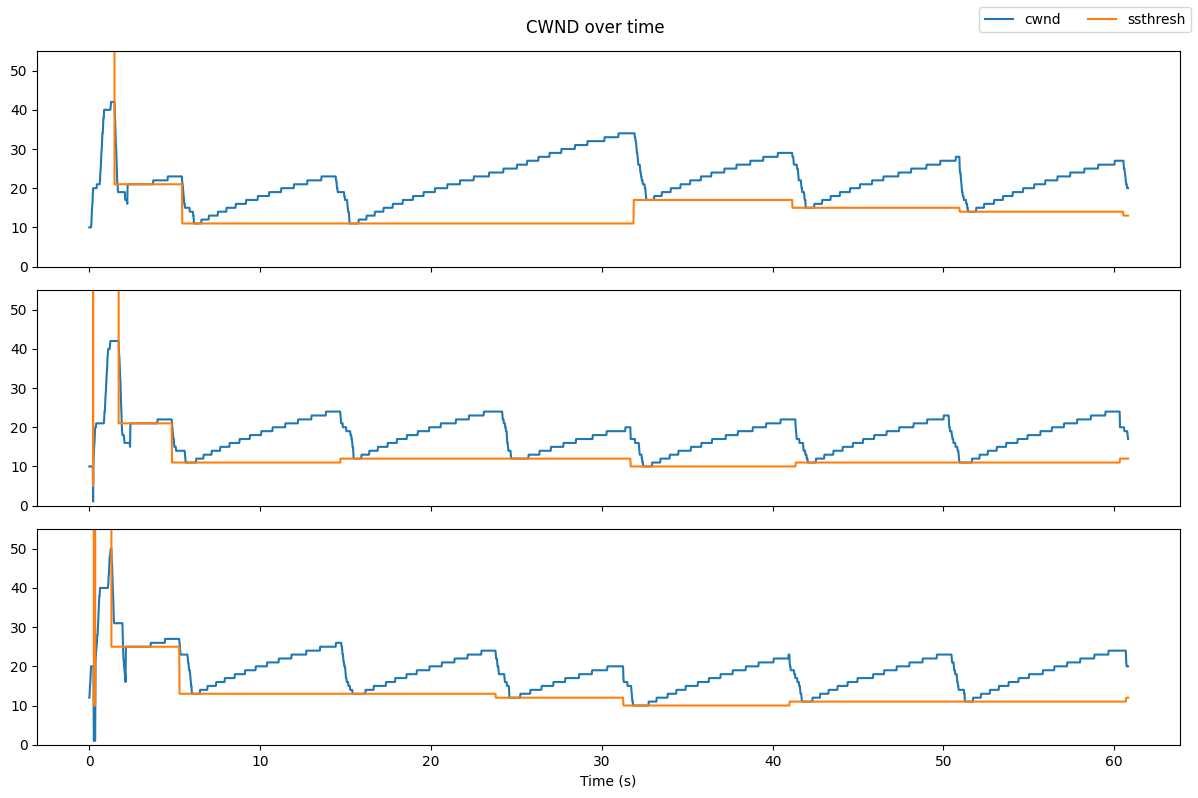

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sender-ss.csv", names=['time', 'sender', 'retx_unacked', 'retx_cum', 'cwnd', 'ssthresh', 'rtt'])

# exclude the "control" flow
s = df.groupby('sender').size()
df_filtered = df[df.groupby("sender")['sender'].transform('size') > 100]

senders = df_filtered.sender.unique()

time_min = df_filtered.time.min()
cwnd_max = 1.1*df_filtered.cwnd.max()
dfs = [df_filtered[df_filtered.sender==senders[i]] for i in range(3)]

fig, axs = plt.subplots(len(senders), sharex=True, figsize=(12,8))
fig.suptitle('CWND over time')
for i in range(len(senders)):
    if i==len(senders)-1:
        axs[i].plot(dfs[i]['time']-time_min, dfs[i]['cwnd'], label="cwnd")
        axs[i].plot(dfs[i]['time']-time_min, dfs[i]['ssthresh'], label="ssthresh")
        axs[i].set_ylim([0,cwnd_max])
        axs[i].set_xlabel("Time (s)");
    else:
        axs[i].plot(dfs[i]['time']-time_min, dfs[i]['cwnd'])
        axs[i].plot(dfs[i]['time']-time_min, dfs[i]['ssthresh'])
        axs[i].set_ylim([0,cwnd_max])


plt.tight_layout();
fig.legend(loc='upper right', ncol=2);

#### Additional exercise: Transfer .pcap files from a FABRIC host

After you have executed the TCP ECN exercise, you can retrieve the `romeo-tcp-ecn.pcap` and `juliet-tcp-ecn.pcap` files from the FABRIC hosts with the following commands:

In [ ]:
slice.get_node("romeo").download_file("/home/fabric/work/romeo-tcp-ecn.pcap", "romeo-tcp-ecn.pcap")
slice.get_node("juliet").download_file("/home/fabric/work/juliet-tcp-ecn.pcap", "juliet-tcp-ecn.pcap")

Then in the Jupyter environment, click on the folder icon in the file browser on the left to make sure that you are located in your “Jupyter home” directory.

You should see the above .pcap files appear in the Jupyter file browser on the left. You can now download this file from the Jupyter environment to your own laptop to analyze them in Wireshark.

### Delete your slice

When you finish your experiment, you should delete your slice! The following cells deletes all the resources in your slice, freeing them for other experimenters.

In [ ]:
slice = fablib.get_slice(name=slice_name)
fablib.delete_slice(slice_name)

In [ ]:
# slice should end up in "Dead" state
# re-run this cell until you see it in "Dead" state
slice.update()
_ = slice.show()

### Acknowledgment
Adapted from [Wireless Implementation Testbed Lab](https://witestlab.poly.edu/blog/)'s experiments.